# 3-2. Dimensionality Reduction (차원축소)


### 차원축소의 필요성

일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게되고, 희소한 구조를 갖는다.

수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다.

또한 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성이 크다.

매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석 할 수 있다.

차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다.

선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.

## Load Datasets

In [7]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print(X_cancer.shape)

(569, 30)


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls

drive/  sample_data/


In [9]:
# fruits classification dataset
fruits = pd.read_table('/content/drive/MyDrive/Colab Notebooks/data/fruit_data_with_colors.txt')
X_fruits = np.asarray(fruits[['mass','width','height', 'color_score']])
y_fruits = np.asarray(fruits[['fruit_label']] - 1)

## Principal Components Analysis (PCA)

### PCA :

PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다.
PCA로 차원을 축소할 떄는 기존 데이터의 정보 유실이 최소화 되는 것이 당연하다.    
이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소한다.   
즉 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주한다.

In [10]:
# Principal Components Analysis (PCA)
# Using PCA to find the first two principal components of the breast cancer dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
# PCA를 하기전에는 정규화를 해야한다. 그렇지 않으면 성능이 좋지 않을 수 있다..!

X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  
pca = PCA(n_components = 2).fit(X_normalized) # n_componets =2 는 2차원으로 변환한다는 걸 뜻한다. 
X_pca = pca.transform(X_normalized) # transform은 해줘야 한다.

print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


30->2차원으로 축소되었다.

In [13]:
# import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    # plt.show()

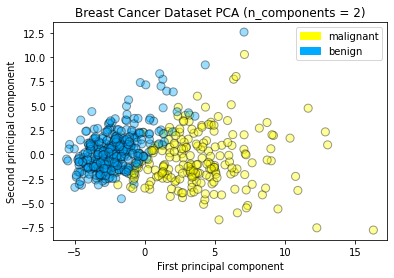

In [14]:
# Plotting the PCA-transformed version of the breast cancer dataset
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

분류도 되고, 같은 특성끼리 이웃해졌다.

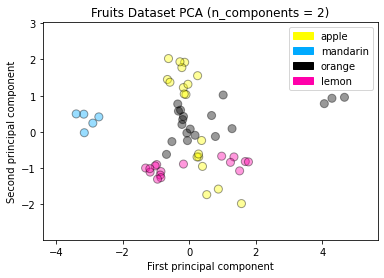

In [15]:
# PCA on the fruit dataset (for comparison)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  
pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

분류가 안되는 것 아닌가? 라는 생각이 들지만, PCA는 분류가 주기능이 아니다. 데이터의 분산을 보존하는데 최적화 되어있다.

## Multidimensional scaling (MDS) 

### MDS :

MDS 란 차원축소를 해도 기존 변수 간의 거리를 유지하려는 기법이다. 서로 거리가 멀었던 변수는 멀게, 가까웠던 변수는 가깝게.

In [ ]:
# Multidimensional scaling (MDS) on the fruit dataset
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

In [ ]:
# Multidimensional scaling (MDS) on the breast cancer dataset
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

## t-SNE

### t-SNE:

Local neighborhood를 잘 보존하면서 차원 축소 하는 것에 초점이 맞춰진 기법이다. 

가까이 있던 데이터들이 차원축소 이후에도 이웃해 있기를 바라는 기법

In [ ]:
# t-SNE on the fruit dataset
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

In [ ]:
# t-SNE on the breast cancer dataset
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');